# Emotion Mining: Exploring Sentiment in Social Media Text with NLP

Dataset:-

https://drive.google.com/file/d/1SvqtbPP82DNRR833bttGfgiAHxejQ54C/view?usp=sharing

Data Description -:

"Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

# Learnings from the assingment


Wordcloud: Wordclouds provide a visual representation of the most frequent words in the text data, with the size of each word indicating its frequency. From the wordcloud, we can quickly identify common themes or prevalent emotions expressed in the text data for eg really , love ,feel appear frequently

Stemming, Lemmatization, Tokenization preprocessing:
Preprocessing techniques like stemming, lemmatization, and tokenization are essential for text normalization and feature extraction.

TF-IDF | Bag of Words:TF-IDF (Term Frequency-Inverse Document Frequency) and Bag of Words are common techniques used for text representation and feature extraction in natural language processing.
TF-IDF calculates the importance of a word in a document relative to a corpus, considering both its frequency in the document and its rarity across the corpus.
Bag of Words represents text data by counting the frequency of words in a document, disregarding the order or context of the words.

Part of Speech Tagging (POS): Part of Speech (POS) tagging is the process of assigning a grammatical category (such as noun, verb, adjective, etc.) to each word in a sentence.

Paraphrasing:Paraphrasing involves expressing the same meaning of a text using different words or phrases.

Topic Modeling:Topic modeling algorithms like Latent Dirichlet Allocation (LDA) can uncover hidden thematic structures within the text data

Named Entity Recognition (NER):NER is the task of identifying and categorizing named entities (such as names of persons, organizations, locations, etc.) in text data.NER  assist in identifying entities associated with specific emotions or sentiments, providing additional context for analyzing emotional expressions in text data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud

In [ ]:
data=pd.read_csv("sample_data.csv")
data.head()  #The emotions are classified into 6 categories: sadness(0), joy(1), love(2), anger(3), fear(4), and surprise(5)

Unnamed: 0                                               text  label
0       36130  id say maybe made them feel foolish but that w...      0
1      138065  i joined the lds church i admit to feeling som...      0
2      146440  i must admit i didnt feel like hugging him not...      3
3      103337  i hate that i can still feel if any nerve is d...      0
4      315528                  im actually feeling a little smug      1

# Data Inspection

In [ ]:
data.shape

(15986, 3)

In [ ]:
data.info

<bound method DataFrame.info of        Unnamed: 0                                               text  label
0           36130  id say maybe made them feel foolish but that w...      0
1          138065  i joined the lds church i admit to feeling som...      0
2          146440  i must admit i didnt feel like hugging him not...      3
3          103337  i hate that i can still feel if any nerve is d...      0
4          315528                  im actually feeling a little smug      1
...           ...                                                ...    ...
15981      219219  i feel envious in the way the conotates a sort...      3
15982      241545  i am walking with god through this pain instea...      0
15983       46030  i feel for he animals that are damaged and killed      0
15984      239660  i feel like some people need not to get offend...      3
15985       94960              i was feeling and i broke down crying      0

[15986 rows x 3 columns]>

# Checking missing values and duplicate values

In [ ]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
text          0
label         0
dtype: int64


In [ ]:
# Summary statistics
print(data.describe())

          Unnamed: 0         label
count   15986.000000  15986.000000
mean   209387.336294      1.564119
std    120908.183410      1.484837
min        81.000000      0.000000
25%    104339.000000      0.000000
50%    207915.000000      1.000000
75%    315527.250000      3.000000
max    416808.000000      5.000000


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = data.drop_duplicates()

# Print the cleaned DataFrame
print(data.shape)

(15986, 3)


# Renaming

In [ ]:
# Rename Columns
data.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Lets Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
data['Label'] = data['Label'].replace(0,'Sadness')
data['Label'] = data['Label'].replace(1,'Joy')
data['Label'] = data['Label'].replace(2,'Love')
data['Label'] = data['Label'].replace(3,'Anger')
data['Label'] = data['Label'].replace(4,'Fear')
data['Label'] = data['Label'].replace(5,'Surprise')
data.head()

Text    Label
0  id say maybe made them feel foolish but that w...  Sadness
1  i joined the lds church i admit to feeling som...  Sadness
2  i must admit i didnt feel like hugging him not...    Anger
3  i hate that i can still feel if any nerve is d...  Sadness
4                  im actually feeling a little smug      Joy

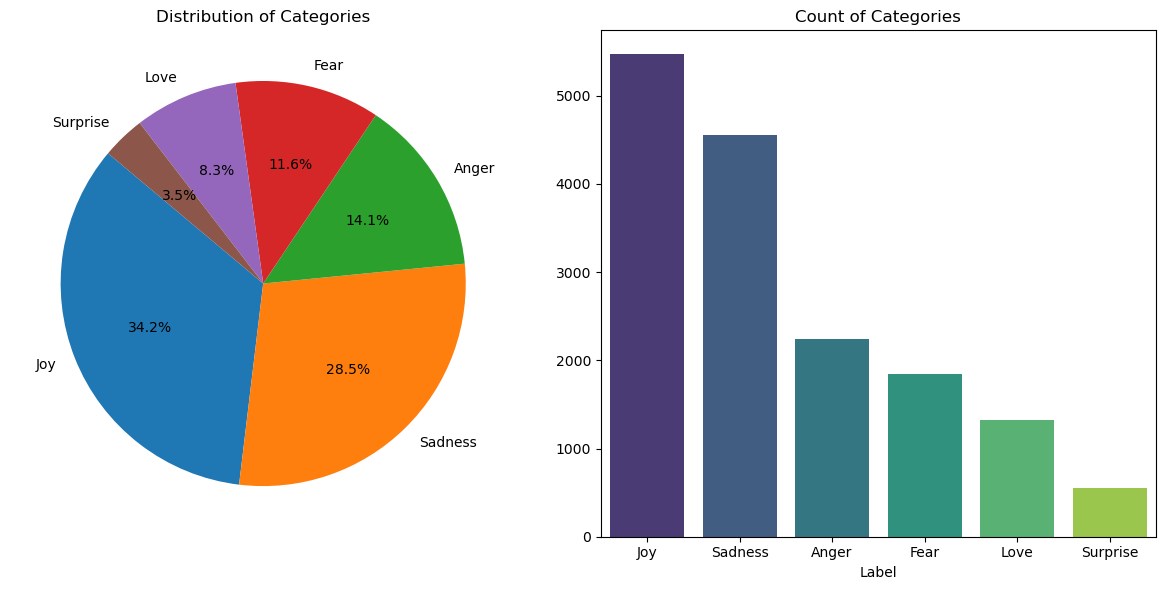

In [ ]:
# Value Count Of Label
count = data['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Make Seperate Data Set to Visualize text
# Sadness
df_sadness = data[data['Label']=='Sadness']
# Joy
df_joy = data[data['Label']=='Joy']
# Love
df_love = data[data['Label']=='Love']
# Anger
df_anger = data[data['Label']=='Anger']
# Fear
df_fear = data[data['Label']=='Fear']
# Surprise
df_surprise = data[data['Label']=='Surprise']
data.head()

Text    Label
0  id say maybe made them feel foolish but that w...  Sadness
1  i joined the lds church i admit to feeling som...  Sadness
2  i must admit i didnt feel like hugging him not...    Anger
3  i hate that i can still feel if any nerve is d...  Sadness
4                  im actually feeling a little smug      Joy

# Word Cloud

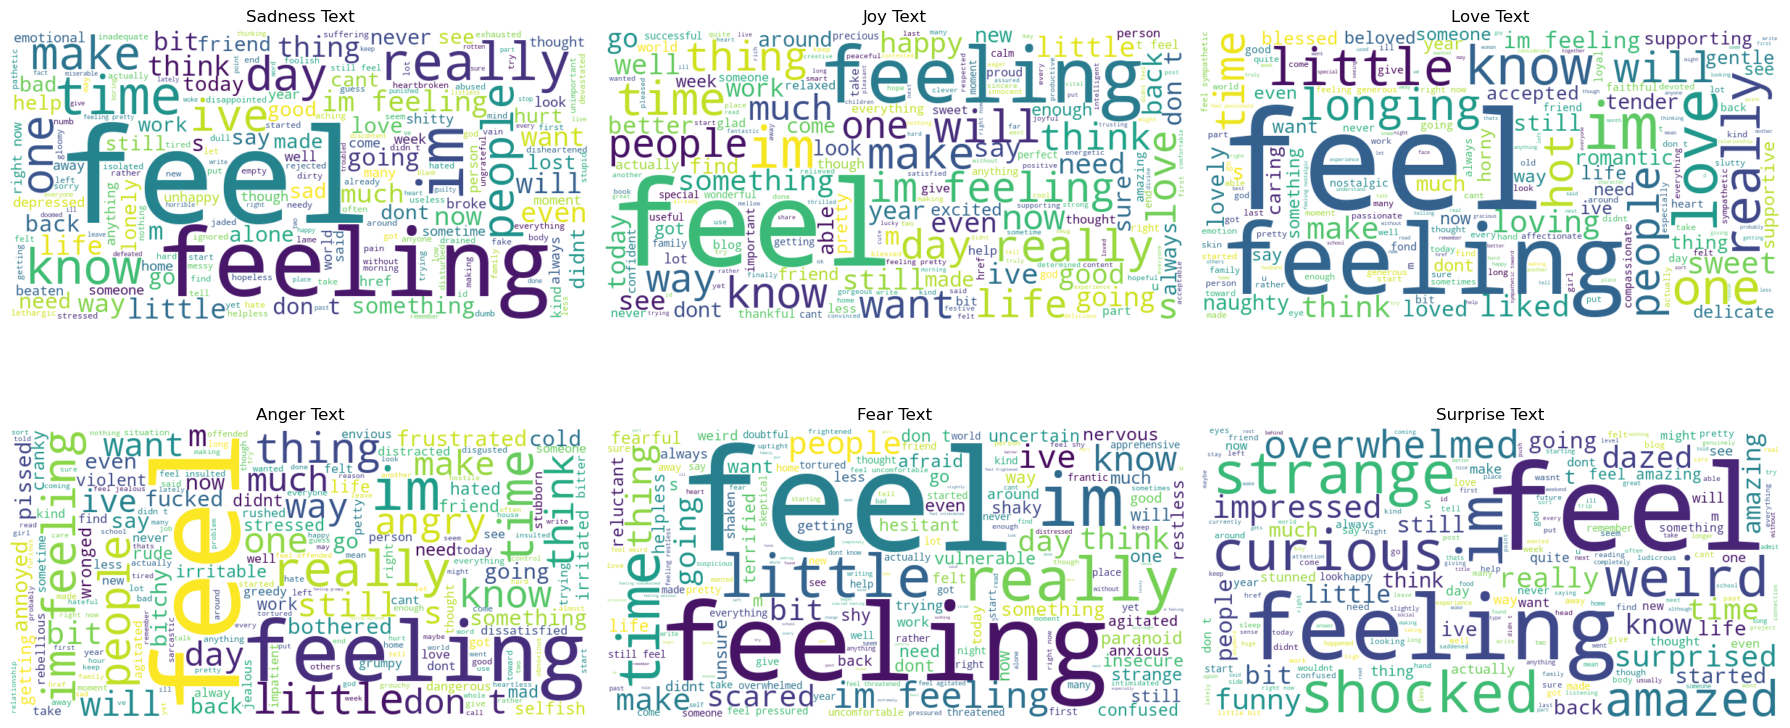

In [ ]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

# Removal of stopwards

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tokens = word_tokenize(text)
    # Remove stopwords and stem tokens
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

# Clean the text data in the 'text' column of DataFrame df
data['cleaned_text'] = data['Text'].apply(clean_text)

# Print the DataFrame with cleaned text data
print(data[['Text', 'cleaned_text']])


                                                    Text  \
0      id say maybe made them feel foolish but that w...   
1      i joined the lds church i admit to feeling som...   
2      i must admit i didnt feel like hugging him not...   
3      i hate that i can still feel if any nerve is d...   
4                      im actually feeling a little smug   
...                                                  ...   
15981  i feel envious in the way the conotates a sort...   
15982  i am walking with god through this pain instea...   
15983  i feel for he animals that are damaged and killed   
15984  i feel like some people need not to get offend...   
15985              i was feeling and i broke down crying   

                                            cleaned_text  
0      id say mayb made feel foolish would reeeeeeall...  
1      join ld church admit feel somewhat asham famil...  
2      must admit didnt feel like hug angri disgust d...  
3      hate still feel nerv damag badli eno

Word Cloud after removing the stopwords

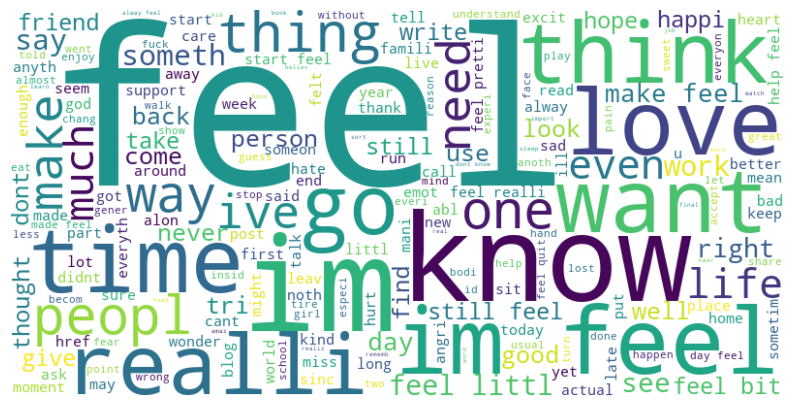

In [ ]:
def make_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join(data['cleaned_text'])

make_word_cloud(all_words)

# Stemming, Lemmatization, Tokenization

NOTE -: cleaned_text is only processed using stopwords removal where as Cleaned_Text is processed with all the other pre        processing techniques

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

# Function for text cleaning and tokenization
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization(Reduce words to their base form for consistency)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
     # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens


# Apply text cleaning and tokenization to the 'Comment' column
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Display the cleaned and tokenized data
print(data[['Text', 'Cleaned_Text','cleaned_text']])
data.head()

                                                    Text  \
0      id say maybe made them feel foolish but that w...   
1      i joined the lds church i admit to feeling som...   
2      i must admit i didnt feel like hugging him not...   
3      i hate that i can still feel if any nerve is d...   
4                      im actually feeling a little smug   
...                                                  ...   
15981  i feel envious in the way the conotates a sort...   
15982  i am walking with god through this pain instea...   
15983  i feel for he animals that are damaged and killed   
15984  i feel like some people need not to get offend...   
15985              i was feeling and i broke down crying   

                                            Cleaned_Text  \
0      [id, say, mayb, made, feel, foolish, would, re...   
1      [join, ld, church, admit, feel, somewhat, asha...   
2      [must, admit, didnt, feel, like, hug, angri, d...   
3      [hate, still, feel, nerv, damag,

Text    Label  \
0  id say maybe made them feel foolish but that w...  Sadness   
1  i joined the lds church i admit to feeling som...  Sadness   
2  i must admit i didnt feel like hugging him not...    Anger   
3  i hate that i can still feel if any nerve is d...  Sadness   
4                  im actually feeling a little smug      Joy   

                                        cleaned_text  \
0  id say mayb made feel foolish would reeeeeeall...   
1  join ld church admit feel somewhat asham famil...   
2  must admit didnt feel like hug angri disgust d...   
3  hate still feel nerv damag badli enough often ...   
4                          im actual feel littl smug   

                                        Cleaned_Text  
0  [id, say, mayb, made, feel, foolish, would, re...  
1  [join, ld, church, admit, feel, somewhat, asha...  
2  [must, admit, didnt, feel, like, hug, angri, d...  
3  [hate, still, feel, nerv, damag, badli, enough...  
4                    [im, actual, feel, littl, smug]

#  TF-IDF | Bag of Words

- TF-IDF (Term Frequency-Inverse Document Frequency) is employed to assign weights to words based on how frequently they appear in a specific Twitter message (Term Frequency) and how rare they are across all Twitter messages in the dataset (Inverse Document Frequency). This process allows us to highlight words that are not only frequent within a single message but also distinctive across the entire corpus of Twitter messages.


- Bag of Words technique on the "Emotions" dataset enables us to represent each Twitter message as a numerical vector, simplifying the text data for analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Assuming 'data' is your DataFrame containing the 'Cleaned_Text' column

# Convert the list of cleaned tokens back to text
data['Cleaned_Text'] = data['Cleaned_Text'].apply(lambda x: ' '.join(x))

# Bag of Words representation
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Cleaned_Text'])

# Convert Bag of Words matrix to DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Cleaned_Text'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the label and the TF-IDF/BOW matrix
bow_df_with_label = pd.concat([data['Label'], bow_df], axis=1)
tfidf_df_with_label = pd.concat([data['Label'], tfidf_df], axis=1)

# Display the results
print("Bag of Words DataFrame:")
print(bow_df_with_label.head())

print("\nTF-IDF DataFrame:")
print(tfidf_df_with_label.head())


Bag of Words DataFrame:
     Label  aa  aaa  aabsolut  aac  aaradhya  ab  abandon  abat  abbasi  ...  \
0  Sadness   0    0         0    0         0   0        0     0       0  ...   
1  Sadness   0    0         0    0         0   0        0     0       0  ...   
2    Anger   0    0         0    0         0   0        0     0       0  ...   
3  Sadness   0    0         0    0         0   0        0     0       0  ...   
4      Joy   0    0         0    0         0   0        0     0       0  ...   

   zheng  zhenshou  zilch  zimbabwean  zingi  zip  zombi  zone  zx  zylstra  
0      0         0      0           0      0    0      0     0   0        0  
1      0         0      0           0      0    0      0     0   0        0  
2      0         0      0           0      0    0      0     0   0        0  
3      0         0      0           0      0    0      0     0   0        0  
4      0         0      0           0      0    0      0     0   0        0  

[5 rows x 10329 columns]



# Part of Speech Tagging (POS)

Part-of-speech (POS) tagging on the data is essential for understanding the grammatical structure of sentences. It helps in various natural language processing tasks such as information extraction, sentiment analysis, and machine translation. By tagging each word with its corresponding part of speech, we gain insights into sentence syntax, enabling more accurate analysis and processing of textual data.

In [ ]:
# Tokenize the cleaned text
tokens = word_tokenize(" ".join(data['Cleaned_Text']))

# Perform POS tagging
pos_tags = pos_tag(tokens)

print(pos_tags)

[('id', 'NNS'), ('say', 'VBP'), ('mayb', 'NNS'), ('made', 'VBN'), ('feel', 'NN'), ('foolish', 'JJ'), ('would', 'MD'), ('reeeeeealli', 'VB'), ('reach', 'VB'), ('join', 'NN'), ('ld', 'JJ'), ('church', 'NN'), ('admit', 'NN'), ('feel', 'VB'), ('somewhat', 'RB'), ('asham', 'JJ'), ('famili', 'NN'), ('background', 'NN'), ('light', 'VBD'), ('mormon', 'JJ'), ('ideal', 'JJ'), ('present', 'JJ'), ('must', 'MD'), ('admit', 'VB'), ('didnt', 'JJ'), ('feel', 'NN'), ('like', 'IN'), ('hug', 'NN'), ('angri', 'NN'), ('disgust', 'NN'), ('didnt', 'NN'), ('feel', 'VB'), ('deserv', 'JJ'), ('affect', 'JJ'), ('moment', 'NN'), ('hate', 'NN'), ('still', 'RB'), ('feel', 'VB'), ('nerv', 'RB'), ('damag', 'JJ'), ('badli', 'NN'), ('enough', 'RB'), ('often', 'RB'), ('enough', 'JJ'), ('loo', 'JJ'), ('sensat', 'NN'), ('eventu', 'NN'), ('die', 'NN'), ('becom', 'NN'), ('numb', 'JJ'), ('cant', 'NN'), ('emot', 'NN'), ('im', 'VBP'), ('actual', 'JJ'), ('feel', 'NN'), ('littl', 'NN'), ('smug', 'NN'), ('left', 'VBD'), ('without'

# Paraphrasing

Paraphrasing is essential in NLP as it helps machines grasp the meaning of human text input. In NLP, spoken language is translated into computer-readable format, forming the basis for machine learning algorithms. By paraphrasing our cleaned text, we refine its expression and meaning, improving the machine's capacity to understand and process human language more effectively.

In [ ]:
import nltk
from nltk.corpus import wordnet
import random

# Function to get synonyms of a word
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

# Function to perform paraphrasing
def paraphrase_text(text):
    tokens = text.split()
    paraphrased_tokens = []
    for token in tokens:
        synonyms = get_synonyms(token)
        if synonyms:
            paraphrased_tokens.append(random.choice(synonyms))
        else:
            paraphrased_tokens.append(token)
    return ' '.join(paraphrased_tokens)

# Paraphrase the Cleaned_Text column
data['paraphrased_data'] = data['Cleaned_Text'].apply(paraphrase_text)

# Display paraphrased data
#print(paraphrased_data)


In [ ]:
data.head()

Text    Label  \
0  id say maybe made them feel foolish but that w...  Sadness   
1  i joined the lds church i admit to feeling som...  Sadness   
2  i must admit i didnt feel like hugging him not...    Anger   
3  i hate that i can still feel if any nerve is d...  Sadness   
4                  im actually feeling a little smug      Joy   

                                        cleaned_text  \
0  id say mayb made feel foolish would reeeeeeall...   
1  join ld church admit feel somewhat asham famil...   
2  must admit didnt feel like hug angri disgust d...   
3  hate still feel nerv damag badli enough often ...   
4                          im actual feel littl smug   

                                        Cleaned_Text  \
0  id say mayb made feel foolish would reeeeeeall...   
1  join ld church admit feel somewhat asham famil...   
2  must admit didnt feel like hug angri disgust d...   
3  hate still feel nerv damag badli enough often ...   
4                          im actual feel littl smug   

                                    paraphrased_data  
0  ID enounce mayb form experience dopey would re...  
1  articulation ld church allow tactile property ...  
2  mustiness include didnt flavour wish bosom ang...  
3  hatred yet flavour nerv damag badli sufficienc...  
4                im real tactile property littl smug

# Topic Modeling

Topic modeling, especially with LDA (Latent Dirchlet Allocation), on emotions data helps uncover common themes influencing specific emotions. It provides insights into the underlying connections between language and emotions, aiding targeted analysis in sentiment analysis, psychology, and social sciences.

In [ ]:
from gensim import corpora, models

# Assuming 'cleaned_text' contains your preprocessed data
documents = data['Cleaned_Text']

# Tokenize each document
tokenized_documents = [doc.split() for doc in documents]

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Train LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
for idx, topic in lda_model.print_topics():
    print('Topic {}: {}'.format(idx, topic))



Topic 0: 0.102*"feel" + 0.011*"like" + 0.008*"im" + 0.008*"much" + 0.008*"stress" + 0.006*"help" + 0.006*"whole" + 0.006*"get" + 0.005*"littl" + 0.005*"see"
Topic 1: 0.110*"feel" + 0.026*"like" + 0.013*"know" + 0.011*"love" + 0.011*"want" + 0.010*"peopl" + 0.010*"time" + 0.009*"life" + 0.008*"make" + 0.007*"would"
Topic 2: 0.122*"feel" + 0.042*"im" + 0.020*"like" + 0.011*"day" + 0.011*"littl" + 0.010*"realli" + 0.010*"get" + 0.010*"time" + 0.009*"go" + 0.009*"bit"
Topic 3: 0.075*"feel" + 0.009*"would" + 0.006*"could" + 0.006*"move" + 0.006*"strang" + 0.005*"look" + 0.005*"sit" + 0.005*"ach" + 0.004*"bit" + 0.004*"shitti"
Topic 4: 0.068*"feel" + 0.017*"http" + 0.014*"href" + 0.009*"like" + 0.006*"www" + 0.006*"low" + 0.005*"inadequ" + 0.005*"naughti" + 0.005*"honor" + 0.005*"listen"


Topic 0: This topic seems to focus on feelings related to stress or burden, with words like "stress," "much," and "whole" indicating a sense of heaviness or pressure.

Topic 1: This topic appears to center around emotions related to relationships and personal experiences, with words like "love," "peopl," and "life" suggesting themes of connection and introspection.

Topic 2: This topic seems to encompass general feelings and experiences, with words like "day," "littl," and "realli" indicating a range of emotional states and occurrences in daily life.

Topic 3: This topic seems to involve emotions related to movement or action, with words like "move," "strang," and "sit" suggesting a sense of physical or emotional restlessness.

Topic 4: This topic appears to contain emotions expressed through external resources such as links (http, href), possibly indicating a mixture of feelings or experiences shared through online platforms.

# Embeddings

Embeddings for the word "feel" in your data, you can use pre-trained word embeddings such as Word2Vec. Here's how you can do it using Word2Vec embeddings:

In [ ]:

from gensim.models import Word2Vec

# Assuming you have a list of tokenized documents
tokenized_documents = [doc.split() for doc in data['Cleaned_Text']]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_documents, vector_size=100, window=5, min_count=1, workers=4)

# Get the embedding vector for the word "feel"
feel_embedding = word2vec_model.wv['feel']

print("Embedding vector for 'feel':", feel_embedding)


Embedding vector for 'feel': [-0.39430082  0.28016904 -0.08944247  0.05524674 -0.1246044  -1.2441084
  0.4710354   1.1324136  -0.67749757 -0.35505715  0.3629316  -0.962598
 -0.46191907  0.31466907 -0.18117997 -0.47246057  0.06545255 -0.92822754
 -0.16343991 -1.2160124   0.65145487 -0.02181855  0.31241655 -0.20646775
  0.6048454  -0.44845405 -0.260194   -0.3874118  -0.6359497  -0.05765561
  0.25400317  0.16886456  0.25005677 -0.58616245 -0.15562166  0.31015086
  0.08727928 -0.7370408  -0.22975694 -1.4440941   0.0475158  -0.49784115
 -0.11036738 -0.05859102  0.8128126  -0.21022868 -0.53584707  0.06766579
  0.30522972  0.96243244  0.14520058 -0.13116704 -0.2944386   0.13246754
  0.07630406  0.45016417  0.5041646  -0.26070437 -0.4807902   0.6545959
  0.11199892  0.28192174 -0.24959874  0.0659166  -1.0214974   0.45090765
  0.13538194  0.7129507  -0.5478249   0.7297794  -0.06549735  0.8083733
  0.46458924 -0.4506486   0.87022495  0.63209474  0.16066544 -0.02615449
 -0.26183084 -0.03884022 -0

The embedding for the word "feel" is represented as a 100-dimensional vector. Each element in this vector captures different aspects of the word's meaning and context. These embeddings are learned during the training process of the Word2Vec model, where similar words are mapped to nearby points in the embedding space. Therefore, by examining the embedding vector, we gain insight into the semantic relationships and context of the word "feel" within the corpus it was trained on.






In [ ]:
data.head()

Text    Label  \
0  id say maybe made them feel foolish but that w...  Sadness   
1  i joined the lds church i admit to feeling som...  Sadness   
2  i must admit i didnt feel like hugging him not...    Anger   
3  i hate that i can still feel if any nerve is d...  Sadness   
4                  im actually feeling a little smug      Joy   

                                        cleaned_text  \
0  id say mayb made feel foolish would reeeeeeall...   
1  join ld church admit feel somewhat asham famil...   
2  must admit didnt feel like hug angri disgust d...   
3  hate still feel nerv damag badli enough often ...   
4                          im actual feel littl smug   

                                        Cleaned_Text  \
0  id say mayb made feel foolish would reeeeeeall...   
1  join ld church admit feel somewhat asham famil...   
2  must admit didnt feel like hug angri disgust d...   
3  hate still feel nerv damag badli enough often ...   
4                          im actual feel littl smug   

                                    paraphrased_data  
0  ID enounce mayb form experience dopey would re...  
1  articulation ld church allow tactile property ...  
2  mustiness include didnt flavour wish bosom ang...  
3  hatred yet flavour nerv damag badli sufficienc...  
4                im real tactile property littl smug

# Named Entity Recognition (NER)

NER: The main goal of Named Entity Recognition is to locate and classify named entities in text into predefined categories such as persons, organizations, locations, dates, etc.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag, StanfordNERTagger
import pandas as pd
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')


# Function to perform NER using NLTK
def nltk_ner(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)
    entities = nltk.ne_chunk(tagged)
    return entities

# Apply NER to each text
data['Entities'] = data['Text'].apply(nltk_ner)

# Display the result
print(data[['Text', 'Entities']])


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Shaki\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Shaki\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


                                                    Text  \
0      id say maybe made them feel foolish but that w...   
1      i joined the lds church i admit to feeling som...   
2      i must admit i didnt feel like hugging him not...   
3      i hate that i can still feel if any nerve is d...   
4                      im actually feeling a little smug   
...                                                  ...   
15981  i feel envious in the way the conotates a sort...   
15982  i am walking with god through this pain instea...   
15983  i feel for he animals that are damaged and killed   
15984  i feel like some people need not to get offend...   
15985              i was feeling and i broke down crying   

                                                Entities  
0      [(id, NNS), (say, VBP), (maybe, RB), (made, VB...  
1      [(i, NN), (joined, VBD), (the, DT), (lds, NNS)...  
2      [(i, NN), (must, MD), (admit, VB), (i, JJ), (d...  
3      [(i, NN), (hate, VBP), (that, IN), (